In [1]:
from PIL import Image
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
DATADIR = 'C:/Users/mine/Desktop/natural'
CATEGORIES = ['buildings', 'forest', 'sea', 'glaciers', 'mountains']

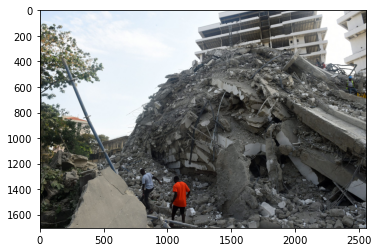

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [4]:
img_array.shape

(1704, 2560, 3)

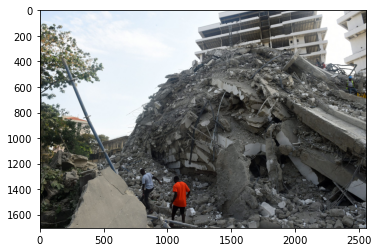

In [5]:
img_size = 228
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
new_array.shape

(228, 228, 3)

In [7]:
training_data = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_train_data()

In [8]:
import random
random.shuffle(training_data)

In [24]:
x = []
y = []

for feature, labels in training_data:
    x.append(feature)


In [25]:
# Normalize the pixel values to be between 0 and 1
x = np.array([i[0] for i in training_data]) / 255.0
y = np.array([i[1] for i in training_data])


In [26]:
# Convert the target labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, len(CATEGORIES))

In [27]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1560, 228, 228, 3), (391, 228, 228, 3), (1560, 5), (391, 5))

In [29]:
# set seed and build the model
tf.random.set_seed = 42
from tensorflow.keras import Sequential
model = Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(228,228,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3),strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

    
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/50
49/49 [==============================] - 411s 8s/step - loss: 1.2757 - accuracy: 0.4744 - val_loss: 1.1714 - val_accuracy: 0.5294
Epoch 2/50
49/49 [==============================] - 382s 8s/step - loss: 1.0967 - accuracy: 0.5577 - val_loss: 1.1469 - val_accuracy: 0.5575
Epoch 3/50
49/49 [==============================] - 379s 8s/step - loss: 1.0514 - accuracy: 0.5821 - val_loss: 0.9680 - val_accuracy: 0.6471
Epoch 4/50
49/49 [==============================] - 376s 8s/step - loss: 0.9840 - accuracy: 0.6064 - val_loss: 0.9357 - val_accuracy: 0.6471
Epoch 5/50
49/49 [==============================] - 379s 8s/step - loss: 0.9965 - accuracy: 0.6141 - val_loss: 0.9350 - val_accuracy: 0.6829
Epoch 6/50
49/49 [==============================] - 7368s 153s/step - loss: 0.9449 - accuracy: 0.6372 - val_loss: 0.9529 - val_accuracy: 0.6317
Epoch 7/50
49/49 [==============================] - 23826s 496s/step - loss: 0.9511 - accuracy: 0.6308 - val_loss: 0.8967 - val_accuracy: 0.6675
Epoch 

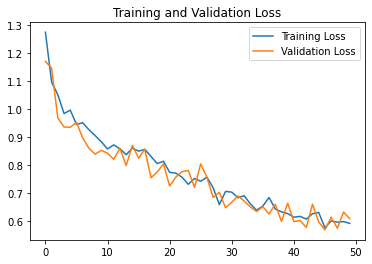

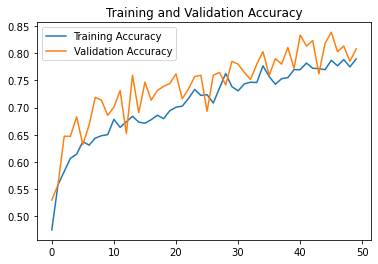

In [30]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy values
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_val, y_val, verbose=0)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.60685795545578
Test accuracy: 0.8081841468811035


In [67]:
y_pred = model.predict(x_val)
y_pred

13/13 [==============================] - 30s 2s/step


array([[2.5257209e-01, 2.2813695e-02, 3.8971311e-01, 3.2689720e-01,
        8.0040079e-03],
       [3.2225570e-03, 9.4779027e-01, 9.6066874e-03, 3.0775656e-04,
        3.9072700e-02],
       [5.0037373e-02, 2.7646981e-03, 7.0738214e-01, 2.1254089e-01,
        2.7274884e-02],
       ...,
       [5.2044320e-01, 2.7738987e-02, 5.3347103e-02, 2.7016243e-01,
        1.2830822e-01],
       [6.2345088e-02, 1.6034612e-02, 1.4058621e-01, 6.1972415e-01,
        1.6130991e-01],
       [1.3758627e-01, 3.1797193e-02, 3.2343769e-01, 5.7834690e-03,
        5.0139540e-01]], dtype=float32)

In [68]:
model.save('my_model.h5')

In [89]:
import numpy as np
from PIL import Image
from keras.models import load_model

# Load your trained CNN model
model = load_model('my_model.h5')

# Load the image you want to classify
image = Image.open(r'C:\Users\mine\Desktop\natural\buildings\images361.jpg')

# Preprocess the image
image = image.resize((228, 228))
image = np.array(image) / 255.0
image = image.reshape((1, 228, 228, 3))

# Make a prediction
preds = model.predict(image)

# Find the index of the highest probability value
pred_class = np.argmax(preds)

# Map the predicted index to the corresponding class label
classes = ['buildings', 'forest', 'sea', 'glaciers', 'mountains']
pred_label = classes[pred_class]

# Display the result
print('The predicted class of the image is:', pred_label)


1/1 [==============================] - 0s 315ms/step
The predicted class of the image is: buildings
